<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/PCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermes Yate Bonilla
**Data Scientist**
---

**Contact:**
- **Email:** [bonillahermes@gmail.com](mailto:bonillahermes@gmail.com)
- **LinkedIn:** [linkedin.com/in/bonillahermes](https://www.linkedin.com/in/bonillahermes/)
- **GitHub:** [github.com/bonillahermes](https://github.com/bonillahermes)
- **Webpage:** [bonillahermes.com](https://bonillahermes.com/)
---

# Análisis del Consumo del Servicio Público de Alcantarillado

## Librerías

In [ ]:
# Instalación de librerías
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Importación de librerías generales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import f_oneway
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import LedoitWolf

# Importación de bibliotecas de machine learning de scikit-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score,
    mean_squared_error, r2_score, silhouette_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

# Importación de XGBoost
import xgboost as xgb

# Importación de bibliotecas para modelos y redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Importación de Keras Tuner
import keras_tuner as kt

# Importación de bibliotecas para visualización interactiva
import plotly.graph_objs as go
import plotly.express as px


### Carga de Base

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/Alcantarillado/Alcantarillado.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.head()

,nuid,inf_pred_utilizada,ruta_de_lectura,numero,fch_exp_fact,fch_ini_periodo_fact,cod_clase_uso,hogar_comunitario,condicion_especial,cons_vertim_m3,...,factor_subs_contr_cf,vlr_sub_contr_cf,factor_subs_contr_cons_vert,vlr_sub_contr_cons_vert,dias_mora,vlr_en_mora,vlr_interes_mora,vlr_tot_facturado,Mes,Año
0,10010,2,1,43546,2016-07-29,2016-07-01,2,0,0,11,...,-0.4,-743,-0.4,-3550,0,0.0,0,6439.0,7,2016
1,10020,2,1,43547,2016-07-29,2016-07-01,2,0,0,15,...,-0.4,-743,-0.4,-4840,0,0.0,0,8375.0,7,2016
2,10030,2,1,43548,2016-07-29,2016-07-01,2,0,0,0,...,-0.4,-743,-0.4,0,0,0.0,0,1115.0,7,2016
3,10040,2,1,43549,2016-07-29,2016-07-01,2,0,0,8,...,-0.4,-743,-0.4,-2582,0,0.0,0,4987.0,7,2016
4,10060,2,1,43550,2016-07-29,2016-07-01,2,0,0,18,...,-0.4,-743,-0.4,-5486,0,0.0,0,10150.0,7,2016


In [ ]:
df.shape

(589650, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589650 entries, 0 to 589649
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   nuid                         589650 non-null  object        
 1   inf_pred_utilizada           589650 non-null  int64         
 2   ruta_de_lectura              589650 non-null  object        
 3   numero                       589650 non-null  int64         
 4   fch_exp_fact                 589650 non-null  datetime64[ns]
 5   fch_ini_periodo_fact         589650 non-null  datetime64[ns]
 6   cod_clase_uso                589650 non-null  int64         
 7   hogar_comunitario            589650 non-null  int64         
 8   condicion_especial           589650 non-null  int64         
 9   cons_vertim_m3               589650 non-null  int64         
 10  cons_vertim_m3_sub           589650 non-null  int64         
 11  factor_subs_contr_cf      

## Análisis Descriptivo Multivariado

### PCA
El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica estadística de reducción de dimensionalidad que se utiliza ampliamente para simplificar la complejidad en conjuntos de datos de alta dimensión al transformarlos a un nuevo sistema de coordenadas de menor dimensión. Las nuevas dimensiones, denominadas componentes principales, se generan de tal manera que el primer componente principal captura la mayor varianza posible de los datos, y cada componente subsiguiente, en orden de extracción, tiene la mayor varianza posible bajo la restricción de ser ortogonal a los anteriores.

La metodología del PCA implica un proceso matemático que transforma las variables originales correlacionadas en un conjunto de variables no correlacionadas. Este proceso comienza con la estandarización de las variables de escala para cada dimensión del conjunto de datos. Luego, se calcula la matriz de covarianza o correlación para identificar las relaciones entre ellas. A partir de esta matriz, se obtienen los autovalores y autovectores que reflejan la magnitud y la dirección de la varianza en los datos. Los autovectores se convierten en los componentes principales, y los autovalores indican la cantidad de varianza que cada componente principal retiene.

La utilidad del PCA en un entorno profesional es multiforme. En el contexto del análisis exploratorio de datos, permite identificar patrones y visualizar la estructura de los datos de manera simplificada. En el ámbito de la construcción de modelos predictivos, el PCA se utiliza para mitigar problemas de multicolinealidad y reducir el tiempo computacional, seleccionando solo aquellos componentes que aportan la mayoría de la información. Además, en campos como la bioinformática y la investigación de mercado, el PCA se emplea para agrupar y clasificar datos complejos de forma intuitiva.

## PCA Global

In [ ]:
# Función para calcular las distancias de Mahalanobis utilizando el método de LedoitWolf para obtener una matriz de covarianza invertible
def mahalanobis_distances(X):
    lw = LedoitWolf()
    cov_matrix = lw.fit(X).covariance_
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean = np.mean(X, axis=0)
    distances = [mahalanobis(x, mean, inv_cov_matrix) for x in X]
    return np.array(distances)

In [ ]:
# Separar la columna 'nuid'
nuid_column = df['nuid']
df_for_pca = df.drop(columns=['nuid', 'Mes', 'Año', 'ruta_de_lectura', 'fch_exp_fact', 'fch_ini_periodo_fact'])

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_pca)


In [ ]:
# Realizar PCA con un random_state para reproducibilidad
pca = PCA(n_components=5, random_state=42)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados del PCA
pca_columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

# Añadir la columna 'nuid' al DataFrame del PCA
df_pca['nuid'] = nuid_column.values

# Imprimir la varianza explicada acumulada
print("Varianza explicada acumulada global:")
print(np.cumsum(pca.explained_variance_ratio_))

Varianza explicada acumulada global:
[0.21191443 0.37822625 0.50817102 0.595338   0.66451255]


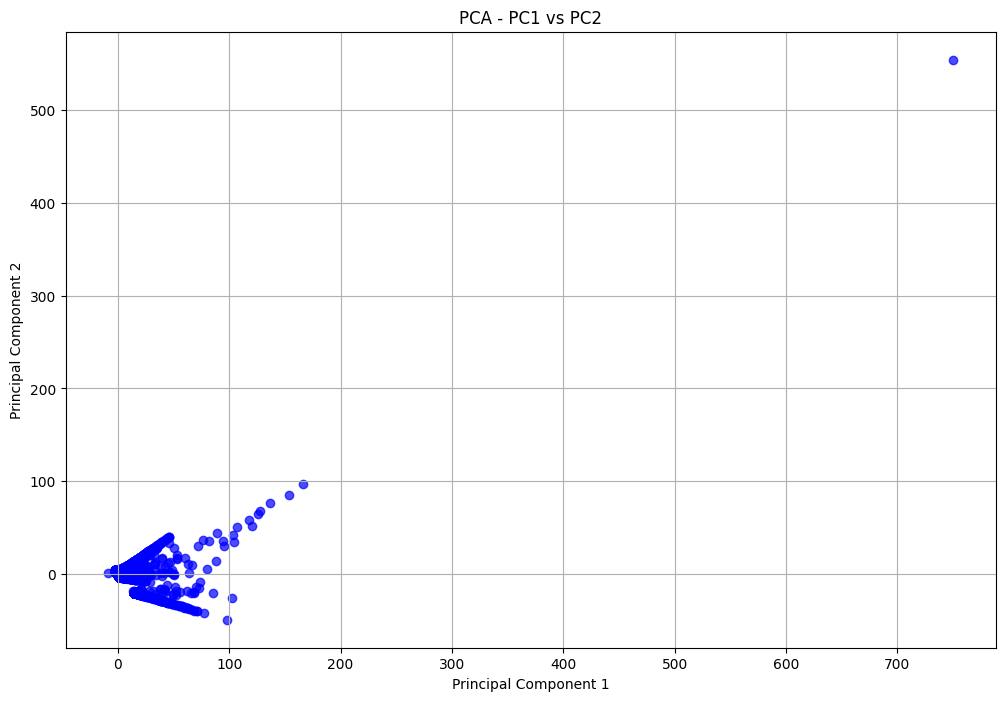

In [ ]:
# Visualizar los datos del PCA en un gráfico de dispersión bidimensional
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7, color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - PC1 vs PC2')
plt.grid(True)
plt.show()

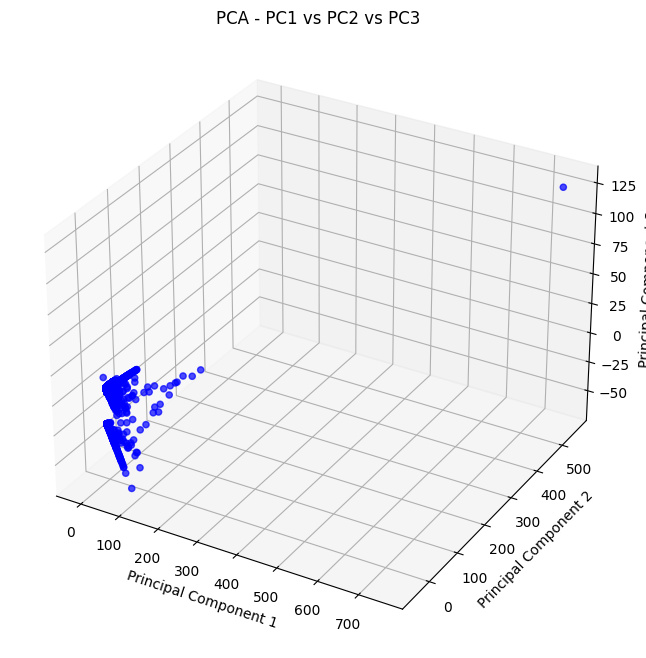

In [ ]:
# Gráfico tridimensional de las primeras tres componentes principales
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.7, color='blue')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - PC1 vs PC2 vs PC3')
plt.show()

In [ ]:
# Calcular distancias de Mahalanobis
distances = mahalanobis_distances(df_scaled)

# Definir un umbral (por ejemplo, percentil 95)
threshold = np.percentile(distances, 95)

# Identificar valores atípicos
outliers = distances > threshold

# Filtrar datos para obtener los valores atípicos
outliers_data = df[outliers].copy()
outliers_data['mahalanobis_distance'] = distances[outliers]
outliers_data['nuid'] = nuid_column[outliers]

# Ordenar los outliers por la distancia de Mahalanobis en orden descendente
outliers_data_sorted = outliers_data.sort_values(by='mahalanobis_distance', ascending=False)

# Obtener los 10 outliers más extremos
top_10_outliers = outliers_data_sorted.head(10)

# Guardar los 10 outliers más extremos en un archivo CSV
top_10_outliers.to_csv('top_10_outliers.csv', index=False)

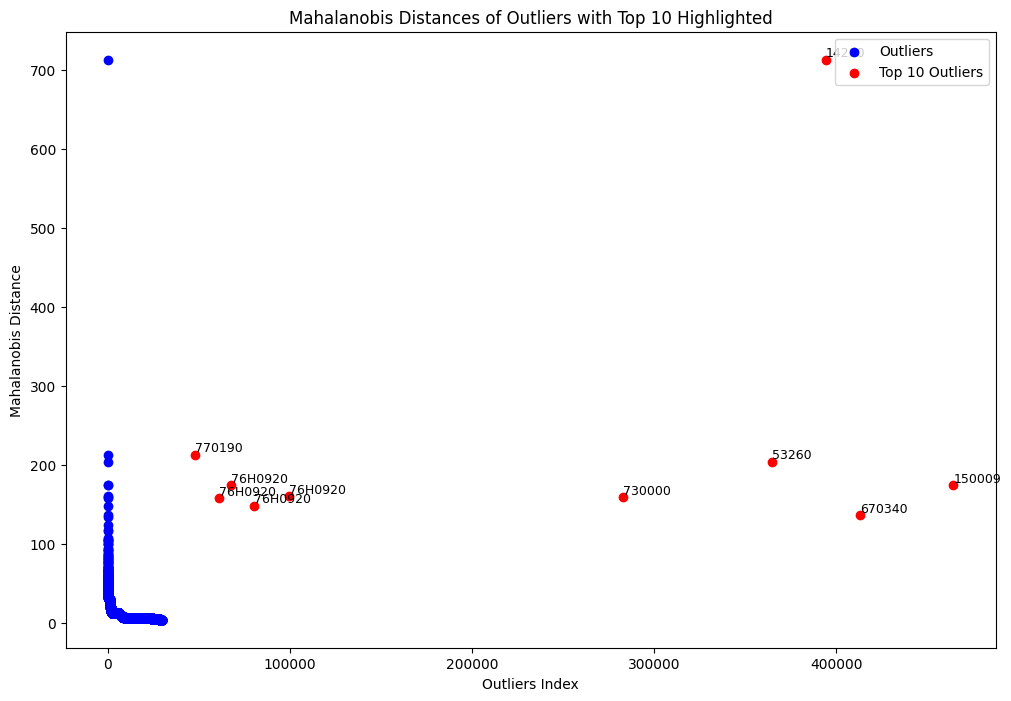

In [ ]:
# Visualizar los 10 outliers más extremos
plt.figure(figsize=(12, 8))
plt.scatter(range(len(outliers_data_sorted)), outliers_data_sorted['mahalanobis_distance'], color='blue', label='Outliers')
plt.scatter(top_10_outliers.index, top_10_outliers['mahalanobis_distance'], color='red', label='Top 10 Outliers')

# Anotar los 'nuid' de los 10 outliers más extremos
for i, row in top_10_outliers.iterrows():
    plt.text(i, row['mahalanobis_distance'], row['nuid'], fontsize=9, verticalalignment='bottom')

plt.xlabel('Outliers Index')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distances of Outliers with Top 10 Highlighted')
plt.legend()
plt.show()

In [ ]:
# Mostrar los 10 outliers más extremos con sus respectivos 'nuid'
print("Top 10 Outliers más extremos:")
print(top_10_outliers[['nuid', 'mahalanobis_distance']])

Top 10 Outliers más extremos:
           nuid  mahalanobis_distance
394207    14280            712.710087
47784    770190            212.992357
364767    53260            204.432443
67598   76H0920            174.838678
464371   150009            174.258716
99310   76H0920            160.572466
282989   730000            159.633024
61016   76H0920            157.939933
80404   76H0920            148.774075
413258   670340            136.901189


In [ ]:
# Filtrar datos para eliminar valores atípicos
df_cleaned = df[~outliers]

# Realizar PCA en los datos limpiados
nuid_column_cleaned = df_cleaned['nuid']
df_for_pca_cleaned = df_cleaned.drop(columns=['nuid', 'Mes', 'Año', 'ruta_de_lectura', 'fch_exp_fact', 'fch_ini_periodo_fact'])
df_scaled_cleaned = scaler.fit_transform(df_for_pca_cleaned)

# Realizar PCA con un random_state para reproducibilidad
pca = PCA(n_components=3, random_state=42)
df_pca = pca.fit_transform(df_scaled_cleaned)

# Crear un DataFrame con los resultados del PCA
pca_columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

# Añadir la columna 'nuid' al DataFrame del PCA
df_pca['nuid'] = nuid_column_cleaned.values

# Imprimir la varianza explicada acumulada
print("Varianza explicada acumulada global:")
print(np.cumsum(pca.explained_variance_ratio_))

Varianza explicada acumulada global:
[0.38181026 0.62633399 0.74716906]


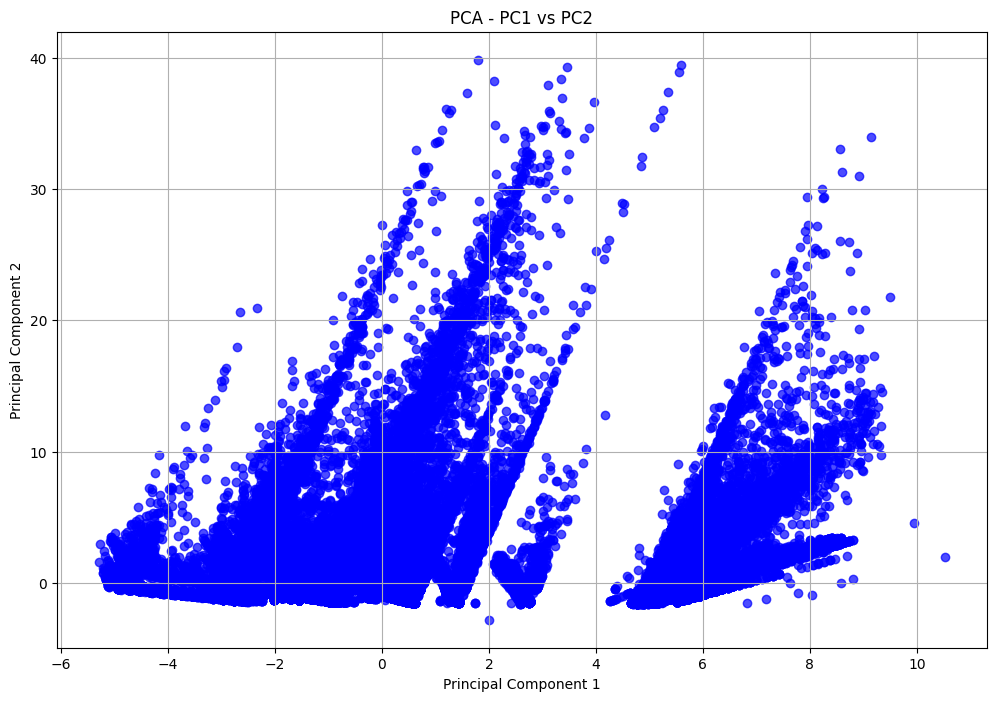

In [ ]:
# Visualizar los datos del PCA limpios en un gráfico de dispersión bidimensional
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7, color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - PC1 vs PC2')
plt.grid(True)
plt.show()

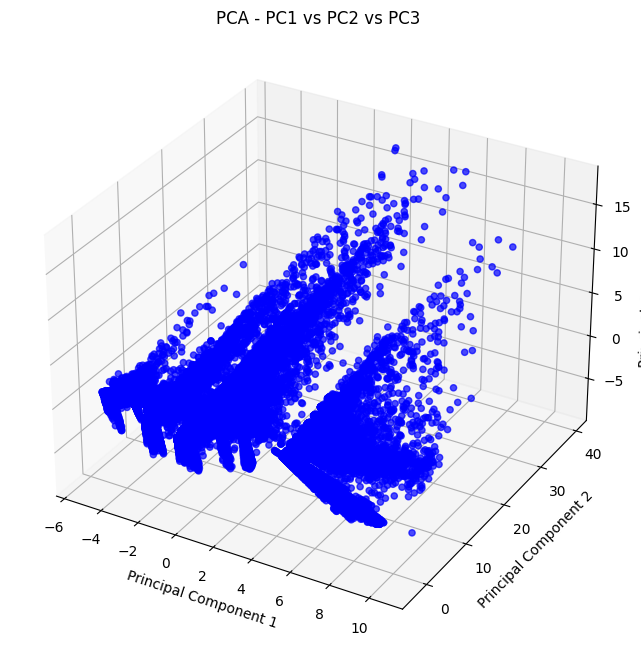

In [ ]:
# Gráfico tridimensional de las primeras tres componentes principales
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.7, color='blue')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - PC1 vs PC2 vs PC3')
plt.show()

## Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

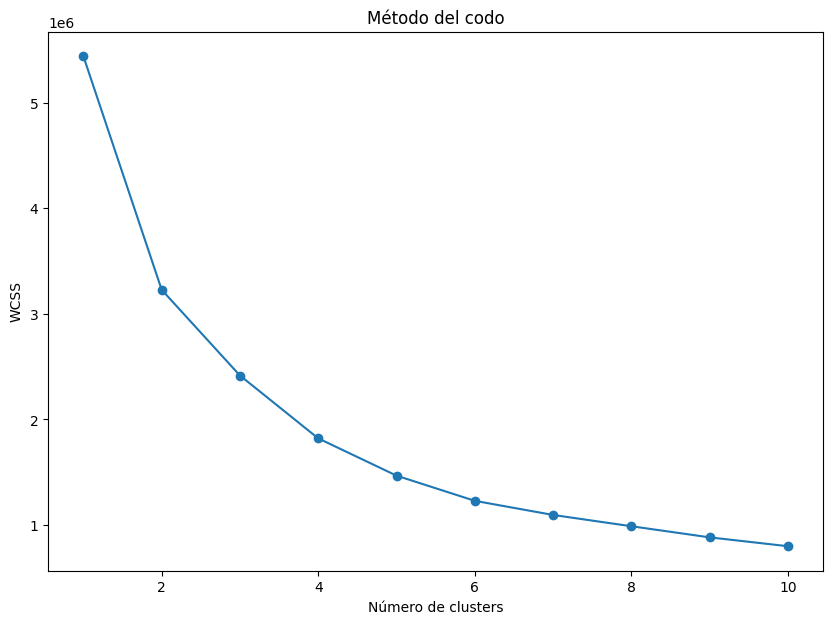

In [ ]:
# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca[pca_columns])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


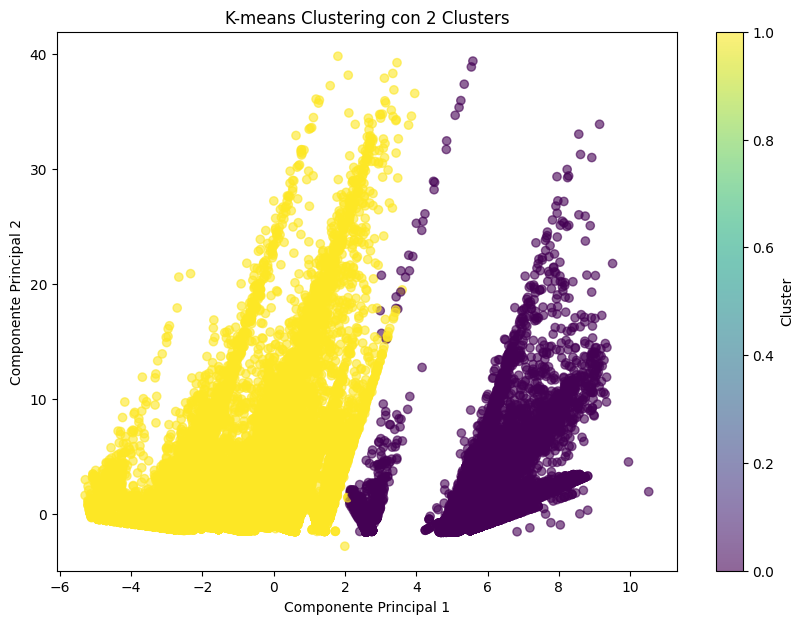

In [ ]:
# Aplicar K-means con el número óptimo de clusters (supongamos que son 2 según el codo)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[pca_columns])

# Visualizar los clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'K-means Clustering con {optimal_clusters} Clusters')
plt.colorbar(label='Cluster')
plt.show()

## PCA Por Mes y Año

Ingrese el mes (1-12): 11
Ingrese el año (2016-2023): 2023
Varianza explicada acumulada para Mes 11 y Año 2023:
[0.23254104 0.41539755 0.55153208 0.64326199 0.71869198]


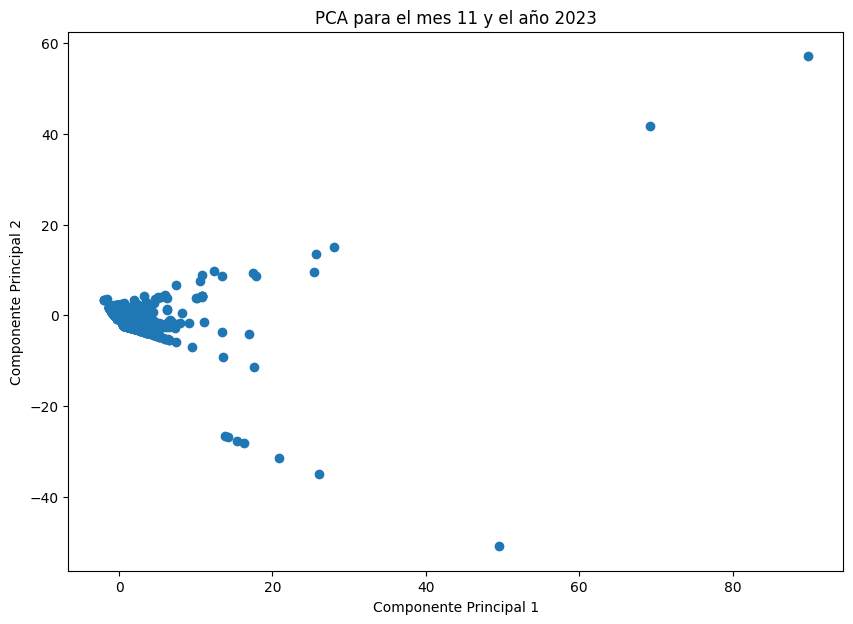

In [ ]:
# Función para realizar el PCA
def realizar_pca(df, mes, año):
    # Verificar que las columnas 'Mes' y 'Año' existen en el DataFrame
    if 'Mes' not in df.columns or 'Año' not in df.columns:
        print("Advertencia: Las columnas 'Mes' o 'Año' no existen en el DataFrame.")
        return

    # Filtrar el DataFrame por mes y año
    df_filtrado = df[(df['Mes'] == mes) & (df['Año'] == año)]

    # Verificar si hay datos después del filtrado
    if df_filtrado.empty:
        print(f"Advertencia: No hay datos disponibles para el mes {mes} y el año {año}.")
        return

    # Eliminar filas con valores NaN
    df_filtrado = df_filtrado.dropna()

    # Verificar si hay datos después de eliminar NaNs
    if df_filtrado.empty:
        print(f"Advertencia: No hay datos suficientes para el mes {mes} y el año {año} después de eliminar valores NaN.")
        return

    # Separar la columna 'nuid'
    nuid_column = df_filtrado['nuid']
    df_for_pca = df_filtrado.drop(columns=['nuid', 'Mes', 'Año', 'ruta_de_lectura', 'fch_exp_fact', 'fch_ini_periodo_fact'])

    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_for_pca)

    # Realizar PCA
    pca = PCA(n_components=5)
    df_pca = pca.fit_transform(df_scaled)

    # Crear un DataFrame con los resultados del PCA
    pca_columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]
    df_pca = pd.DataFrame(df_pca, columns=pca_columns)

    # Añadir la columna 'nuid' al DataFrame del PCA
    df_pca['nuid'] = nuid_column.values

    # Imprimir la varianza explicada acumulada
    print(f"Varianza explicada acumulada para Mes {mes} y Año {año}:")
    print(np.cumsum(pca.explained_variance_ratio_))

    # Graficar los primeros dos componentes principales
    plt.figure(figsize=(10, 7))
    plt.scatter(df_pca['PC1'], df_pca['PC2'])
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title(f'PCA para el mes {mes} y el año {año}')
    plt.show()

# Solicitar al usuario el mes y el año
mes = int(input("Ingrese el mes (1-12): "))
año = int(input("Ingrese el año (2016-2023): "))

# Verificar que el mes y el año estén dentro del rango permitido
if mes < 1 or mes > 12:
    print("Advertencia: El mes ingresado no es válido. Debe estar entre 1 y 12.")
elif año < 2016 or año > 2023:
    print("Advertencia: El año ingresado no es válido. Debe estar entre 2016 y 2023.")
else:
    # Realizar PCA
    realizar_pca(df, mes, año)
